<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 157.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
import yfinance as yf

# Crear objeto Ticker para Tesla (símbolo TSLA)
tsla = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
# Usando el objeto ticker tsla, extraer el historial completo
tesla_data = tsla.history(period="max")

# Opcional: mostrar las primeras filas para verificar
print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
import yfinance as yf

# Crear objeto Ticker para Tesla
tsla = yf.Ticker("TSLA")

# Extraer historial completo de datos
tesla_data = tsla.history(period="max")

# Reiniciar índice para que 'Date' sea una columna normal
tesla_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
import requests

# URL de la página con datos de ingresos de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Hacer la solicitud GET para descargar la página
response = requests.get(url)

# Guardar el contenido HTML de la página en la variable html_data
html_data = response.text

# Opcional: imprimir los primeros 500 caracteres para verificar
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [12]:
from bs4 import BeautifulSoup

# Parsear el HTML con BeautifulSoup usando el parser 'html.parser'
soup = BeautifulSoup(html_data, "html.parser")

# Opcional: imprimir el título de la página para verificar
print(soup.title.string)


Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [20]:
from bs4 import BeautifulSoup
import pandas as pd

# Parsear el HTML (si no lo has hecho)
soup = BeautifulSoup(html_data, 'html.parser')

# Seleccionar el segundo tbody (índice 1)
tbody = soup.find_all("tbody")[1]

# Extraer todas las filas
rows = tbody.find_all("tr")

# Listas para guardar datos
dates = []
revenues = []

for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 

In [21]:
tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

# Primero convertir a string para reemplazar caracteres
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(',|\$',"", regex=True)

# Luego convertir a float
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [24]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
print(tesla_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [26]:
import yfinance as yf

# Crear el objeto ticker para GameStop
gme_ticker = yf.Ticker("GME")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [27]:
# Extraer el historial completo
gme_data = gme_ticker.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [28]:
import yfinance as yf

# Crear objeto ticker para GameStop
gme_ticker = yf.Ticker("GME")

# Extraer historial completo
gme_data = gme_ticker.history(period="max")

# Reiniciar índice para que la fecha pase a ser una columna
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [29]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)
html_data_2 = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [31]:
from bs4 import BeautifulSoup

# Usando html.parser (no necesita instalación extra)
soup = BeautifulSoup(html_data_2, 'html.parser')

# O, si tienes instalado html5lib, puedes usarlo así:
# soup = BeautifulSoup(html_data_2, 'html5lib')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [33]:
# Seleccionar el segundo tbody
tbody = soup.find_all("tbody")[1]

# Extraer todas las filas
rows = tbody.find_all("tr")

# Listas para guardar datos
dates = []
revenues = []

for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        dates.append(date)
        revenues.append(revenue)

# Crear DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

print(df.head())


         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [35]:
# Display the last five rows of the gme_revenue DataFrame
print(df.tail())

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [38]:
# Make sure matplotlib is imported
import matplotlib.pyplot as plt

# Example make_graph function
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')  # ✅ Fixed the missing quote
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


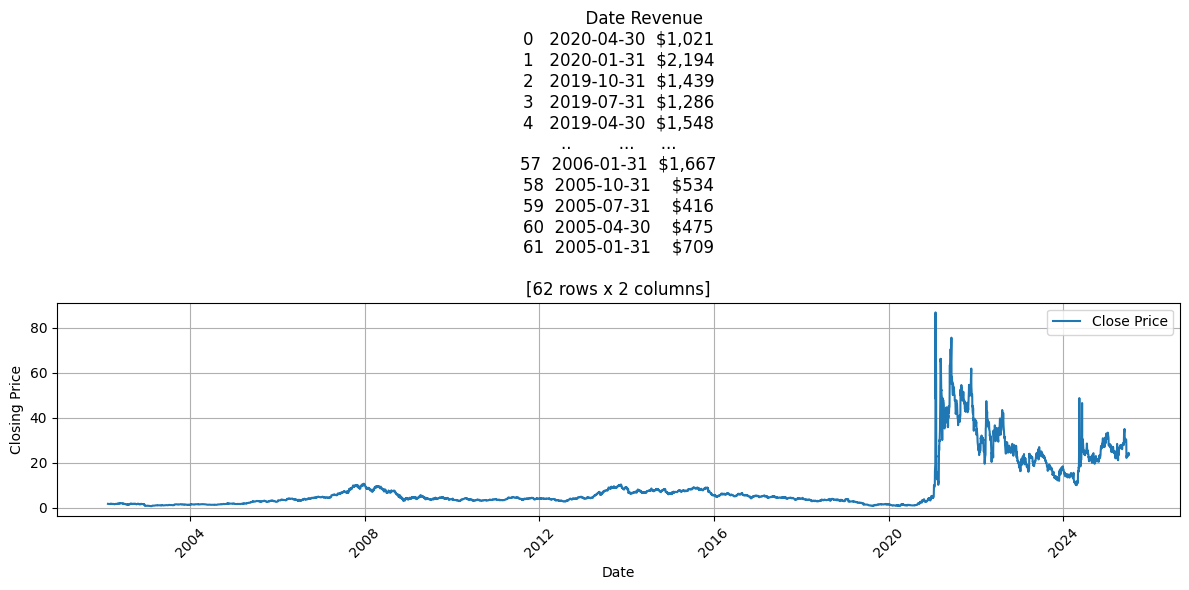

In [41]:
# Rename df to gme_revenue
gme_revenue = df

# Call the graph function
make_graph(gme_data, gme_revenue)

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


In [72]:
print ("Pregunta 1: Utilice yfinance para extraer datos bursátiles")

print ("Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head. Suba una captura de pantalla de los resultados y el código del principio de la Pregunta 1 a los resultados de abajo.")

Pregunta 1: Utilice yfinance para extraer datos bursátiles
Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head. Suba una captura de pantalla de los resultados y el código del principio de la Pregunta 1 a los resultados de abajo.


In [61]:
import yfinance as yf
import pandas as pd

# Descargar datos bursátiles de Tesla (TSLA)
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-07-01')

# Restablecer el índice para que 'Date' sea una columna normal
tesla_data.reset_index(inplace=True)

# Guardar el DataFrame en un archivo CSV (opcional)
tesla_data.to_csv('tesla_data.csv', index=False)

# Mostrar las primeras 5 filas
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed


Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [1]:
print ("Question 2: Use Webscraping to Extract Tesla Revenue Data")
print ("Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.")

Question 2: Use Webscraping to Extract Tesla Revenue Data
Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# Buscar la tabla de ingresos
revenue_table = None
for table in soup.find_all("table"):
    if "Revenue" in table.text:
        revenue_table = table
        break

if revenue_table:
    rows = revenue_table.find("tbody").find_all("tr")
    dates = []
    revenues = []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                dates.append(date)
                revenues.append(revenue)

    tesla_revenue = pd.DataFrame({
        "Date": dates,
        "Revenue": pd.to_numeric(revenues, errors="coerce")
    })

    print(tesla_revenue.tail())
else:
    print("No se encontró la tabla de ingresos.")


No se encontró la tabla de ingresos.


In [64]:
print ("Question 3: Use yfinance to Extract Stock Data")

print ("Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.")

Question 3: Use yfinance to Extract Stock Data
Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [65]:
import yfinance as yf

# Download GameStop stock data (GME)
gme_data = yf.download('GME', start='2010-01-01', end='2023-07-01')

# Reset index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Save to CSV (optional)
gme_data.to_csv('gme_data.csv', index=False)

# Display first five rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed


Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863061  3.703152  3.714934   26702800
1      2010-01-05  3.959004  3.996036  3.854643  3.856326   21269600
2      2010-01-06  4.044851  4.056634  3.908508  3.948906   21471200
3      2010-01-07  3.443929  3.563440  3.268871  3.368183  164761200
4      2010-01-08  3.415316  3.573541  3.405216  3.474229   47872400


In [66]:
print ("Question 4: Use Webscraping to Extract GME Revenue Data")

print ("Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.")

Question 4: Use Webscraping to Extract GME Revenue Data
Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.


In [67]:
# Example of scraping GME revenue table (adjust selectors as needed)
tbody = soup.find_all("tbody")[1]  # second tbody for revenue table
rows = tbody.find_all("tr")

dates = []
revenues = []

for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        dates.append(cols[0].text.strip())
        revenues.append(cols[1].text.strip())

gme_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

print(gme_revenue.tail())


          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


In [68]:
print ("Question 5: Plot Tesla Stock Graph")
print ("Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.")

Question 5: Plot Tesla Stock Graph
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.


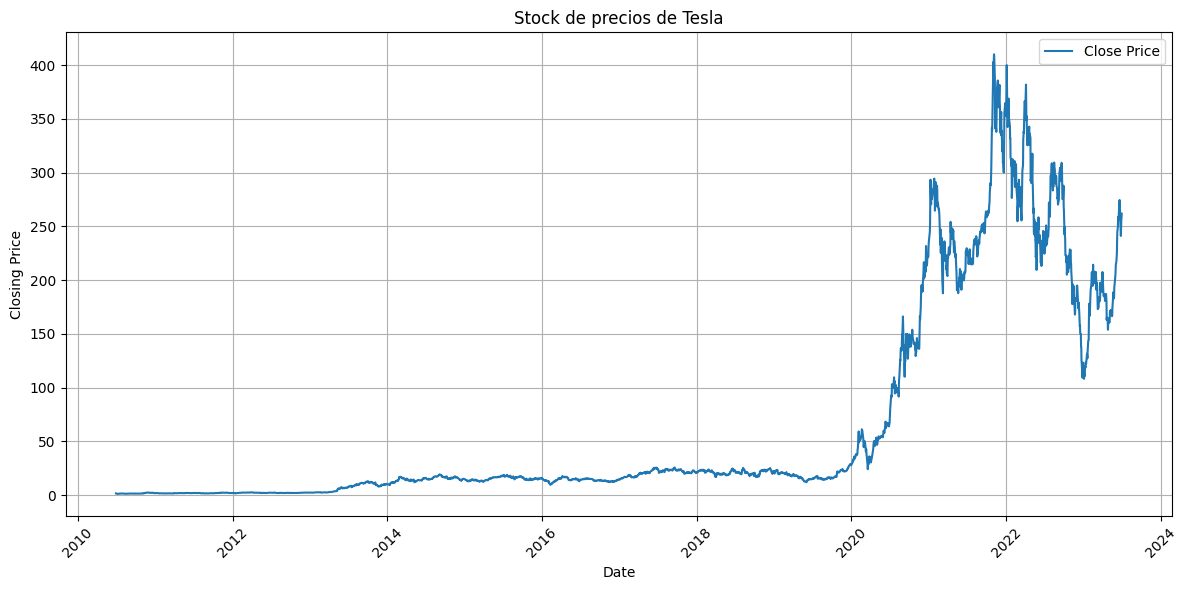

In [73]:
# Assuming tesla_data is your DataFrame with Tesla stock info
make_graph(tesla_data, "Stock de precios de Tesla")

In [70]:
print ("Question 6: Plot GameStop Stock Graph")
print ("Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.")

Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.


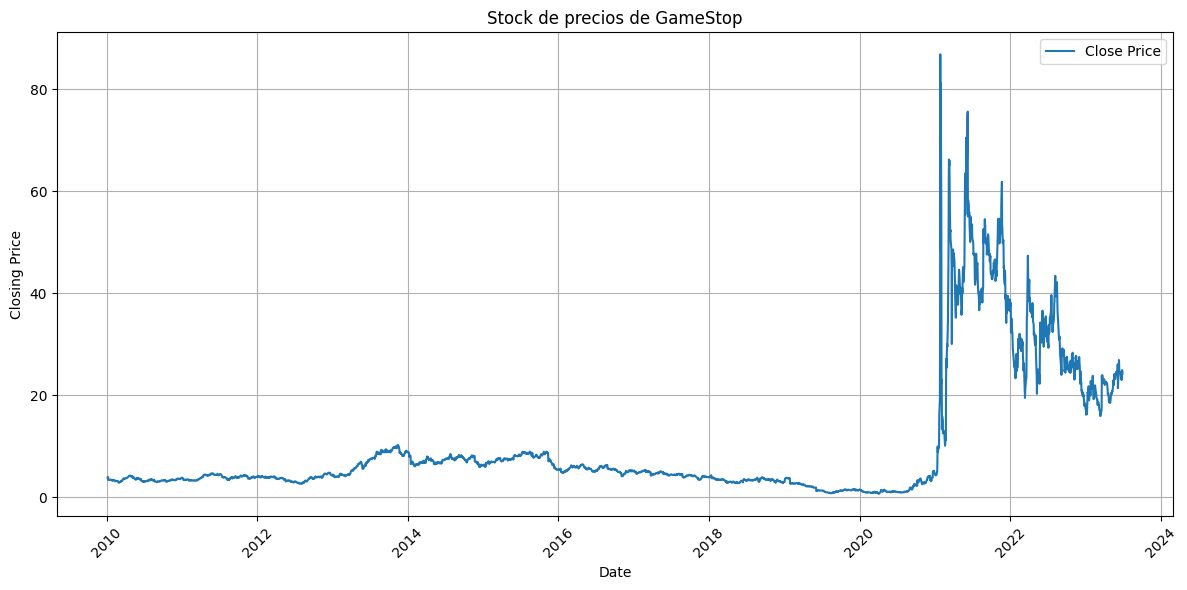

In [74]:
make_graph(gme_data, "Stock de precios de GameStop")